In [1]:
from torch import nn, optim
import torch
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch.nn.functional as F
%matplotlib inline

In [2]:
with open('./PITdf.pkl','rb') as f:
    PITdf = pickle.load(f)
with open('./GREdf.pkl','rb') as f:
    GREdf = pickle.load(f)
with open('./JONdf.pkl','rb') as f:
    JONdf = pickle.load(f)
with open('./MGTdf.pkl','rb') as f:
    MGTdf = pickle.load(f)
with open('./WASdf.pkl','rb') as f:
    WASdf = pickle.load(f)
with open('./WHLdf.pkl','rb') as f:
    WHLdf = pickle.load(f)
with open('./PKSdf.pkl','rb') as f:
    PKSdf = pickle.load(f)
with open('./CBGdf.pkl','rb') as f:
    CBGdf = pickle.load(f)
with open('./STUdf.pkl','rb') as f:
    STUdf = pickle.load(f)
with open('./NPHdf.pkl','rb') as f:
    NPHdf = pickle.load(f)
with open('./ELVdf.pkl','rb') as f:
    ELVdf = pickle.load(f)
with open('./YGTdf.pkl','rb') as f:
    YGTdf = pickle.load(f)
with open('./NCSdf.pkl','rb') as f:
    NCSdf = pickle.load(f)
with open('./BUTdf.pkl','rb') as f:
    BUTdf = pickle.load(f)
with open('./KITdf.pkl','rb') as f:
    KITdf = pickle.load(f)

In [3]:
PITall_data = np.concatenate((PITdf['DNI'].values.reshape(-1,1), BUTdf['DNI'].values.reshape(-1,1), \
                           GREdf['DNI'].values.reshape(-1,1), ELVdf['DNI'].values.reshape(-1,1), \
                           WHLdf['DNI'].values.reshape(-1,1), STUdf['DNI'].values.reshape(-1,1), \
                           WASdf['DNI'].values.reshape(-1,1), NCSdf['DNI'].values.reshape(-1,1), \
                           KITdf['DNI'].values.reshape(-1,1), \
                           PITdf['day_x'].values.reshape(-1,1), PITdf['day_y'].values.reshape(-1,1), \
                           PITdf['time_x'].values.reshape(-1,1), PITdf['time_y'].values.reshape(-1,1)),axis = 1)


In [4]:
BUTall_data = np.concatenate((BUTdf['DNI'].values.reshape(-1,1), PITdf['DNI'].values.reshape(-1,1), \
                           NCSdf['DNI'].values.reshape(-1,1), KITdf['DNI'].values.reshape(-1,1), \
                           YGTdf['DNI'].values.reshape(-1,1), ELVdf['DNI'].values.reshape(-1,1), \
                           WASdf['DNI'].values.reshape(-1,1), GREdf['DNI'].values.reshape(-1,1), \
                           STUdf['DNI'].values.reshape(-1,1), \
                           BUTdf['day_x'].values.reshape(-1,1), BUTdf['day_y'].values.reshape(-1,1), \
                           BUTdf['time_x'].values.reshape(-1,1), BUTdf['time_y'].values.reshape(-1,1)),axis = 1)


In [5]:
WASall_data = np.concatenate((WASdf['DNI'].values.reshape(-1,1), PITdf['DNI'].values.reshape(-1,1), \
                           GREdf['DNI'].values.reshape(-1,1), ELVdf['DNI'].values.reshape(-1,1), \
                           WHLdf['DNI'].values.reshape(-1,1), STUdf['DNI'].values.reshape(-1,1), \
                           MGTdf['DNI'].values.reshape(-1,1), CBGdf['DNI'].values.reshape(-1,1), \
                           PKSdf['DNI'].values.reshape(-1,1), \
                           WASdf['day_x'].values.reshape(-1,1), WASdf['day_y'].values.reshape(-1,1), \
                           WASdf['time_x'].values.reshape(-1,1), WASdf['time_y'].values.reshape(-1,1)),axis = 1)


In [6]:
GREall_data = np.concatenate((GREdf['DNI'].values.reshape(-1,1), PITdf['DNI'].values.reshape(-1,1), \
                           WASdf['DNI'].values.reshape(-1,1), JONdf['DNI'].values.reshape(-1,1), \
                           WHLdf['DNI'].values.reshape(-1,1), STUdf['DNI'].values.reshape(-1,1), \
                           BUTdf['DNI'].values.reshape(-1,1), KITdf['DNI'].values.reshape(-1,1), \
                           PKSdf['DNI'].values.reshape(-1,1), \
                           GREdf['day_x'].values.reshape(-1,1), GREdf['day_y'].values.reshape(-1,1), \
                           GREdf['time_x'].values.reshape(-1,1), GREdf['time_y'].values.reshape(-1,1)),axis = 1)


In [7]:
test_length = 365 * 48 * 1
train_length = 365 * 48 * 5
PITall_data = PITall_data[:(train_length + test_length), :]
BUTall_data = BUTall_data[:(train_length + test_length), :]
WASall_data = WASall_data[:(train_length + test_length), :]
GREall_data = GREall_data[:(train_length + test_length), :]



In [8]:
PITinputs = np.concatenate((PITall_data[3:-4,:], PITall_data[2:-5,:], PITall_data[1:-6,:], PITall_data[:-7,:]), axis = 1)
PITtargets = PITall_data[7:,0]

BUTinputs = np.concatenate((BUTall_data[3:-4,:], BUTall_data[2:-5,:], BUTall_data[1:-6,:], BUTall_data[:-7,:]), axis = 1)
BUTtargets = BUTall_data[7:,0]

WASinputs = np.concatenate((WASall_data[3:-4,:], WASall_data[2:-5,:], WASall_data[1:-6,:], WASall_data[:-7,:]), axis = 1)
WAStargets = WASall_data[7:,0]

GREinputs = np.concatenate((GREall_data[3:-4,:], GREall_data[2:-5,:], GREall_data[1:-6,:], GREall_data[:-7,:]), axis = 1)
GREtargets = GREall_data[7:,0]


In [9]:
PIT_X_train = PITinputs[:train_length,:]
PIT_y_train = PITtargets[:train_length]

PIT_X_test = PITinputs[train_length:,:]
PIT_y_test = PITtargets[train_length:]

BUT_X_train = BUTinputs[:train_length,:]
BUT_y_train = BUTtargets[:train_length]

BUT_X_test = BUTinputs[train_length:,:]
BUT_y_test = BUTtargets[train_length:]

WAS_X_train = WASinputs[:train_length,:]
WAS_y_train = WAStargets[:train_length]

WAS_X_test = WASinputs[train_length:,:]
WAS_y_test = WAStargets[train_length:]

GRE_X_train = GREinputs[:train_length,:]
GRE_y_train = GREtargets[:train_length]

GRE_X_test = GREinputs[train_length:,:]
GRE_y_test = GREtargets[train_length:]


In [10]:
PITscaler = MinMaxScaler()
BUTscaler = MinMaxScaler()
WASscaler = MinMaxScaler()
GREscaler = MinMaxScaler()

PIT_X_train_normalized = PITscaler.fit(PIT_X_train)
PIT_X_train_normalized = PITscaler.transform(PIT_X_train)
PIT_X_test_normalized = PITscaler.transform(PIT_X_test)

BUT_X_train_normalized = BUTscaler.fit(BUT_X_train)
BUT_X_train_normalized = BUTscaler.transform(BUT_X_train)
BUT_X_test_normalized = BUTscaler.transform(BUT_X_test)

WAS_X_train_normalized = WASscaler.fit(WAS_X_train)
WAS_X_train_normalized = WASscaler.transform(WAS_X_train)
WAS_X_test_normalized = WASscaler.transform(WAS_X_test)

GRE_X_train_normalized = GREscaler.fit(GRE_X_train)
GRE_X_train_normalized = GREscaler.transform(GRE_X_train)
GRE_X_test_normalized = GREscaler.transform(GRE_X_test)

In [11]:
PIT_X_train_normalized = torch.from_numpy(PIT_X_train_normalized).float()
PIT_y_train = torch.squeeze(torch.from_numpy(PIT_y_train).float())
PIT_X_test_normalized = torch.from_numpy(PIT_X_test_normalized).float()

BUT_X_train_normalized = torch.from_numpy(BUT_X_train_normalized).float()
BUT_y_train = torch.squeeze(torch.from_numpy(BUT_y_train).float())
BUT_X_test_normalized = torch.from_numpy(BUT_X_test_normalized).float()

WAS_X_train_normalized = torch.from_numpy(WAS_X_train_normalized).float()
WAS_y_train = torch.squeeze(torch.from_numpy(WAS_y_train).float())
WAS_X_test_normalized = torch.from_numpy(WAS_X_test_normalized).float()

GRE_X_train_normalized = torch.from_numpy(GRE_X_train_normalized).float()
GRE_y_train = torch.squeeze(torch.from_numpy(GRE_y_train).float())
GRE_X_test_normalized = torch.from_numpy(GRE_X_test_normalized).float()



In [12]:
class Net(torch.nn.Module):
    def __init__(self, n_features):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_features, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 1)

        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return F.relu(self.fc3(x))


In [13]:
PITnet = Net(PIT_X_train.shape[1])
BUTnet = Net(BUT_X_train.shape[1])
WASnet = Net(WAS_X_train.shape[1])
GREnet = Net(GRE_X_train.shape[1])


In [14]:
PITcriterion = nn.MSELoss()
PIToptimizer = optim.Adam(PITnet.parameters(), lr = 0.01)

BUTcriterion = nn.MSELoss()
BUToptimizer = optim.Adam(BUTnet.parameters(), lr = 0.01)

WAScriterion = nn.MSELoss()
WASoptimizer = optim.Adam(WASnet.parameters(), lr = 0.01)

GREcriterion = nn.MSELoss()
GREoptimizer = optim.Adam(GREnet.parameters(), lr = 0.01)

In [15]:
for epoch in range(1000):
    
    y_pred = PITnet(PIT_X_train_normalized)
    
    y_pred = torch.squeeze(y_pred)
    train_loss = PITcriterion(y_pred, PIT_y_train)
    
    if epoch % 100 == 0:
        print(train_loss)
    
    PIToptimizer.zero_grad()
    
    train_loss.backward()
    
    PIToptimizer.step()

tensor(117710.3281, grad_fn=<MseLossBackward>)
tensor(25618.5293, grad_fn=<MseLossBackward>)
tensor(24663.9512, grad_fn=<MseLossBackward>)
tensor(24207.7051, grad_fn=<MseLossBackward>)
tensor(21580.8105, grad_fn=<MseLossBackward>)
tensor(20136.9727, grad_fn=<MseLossBackward>)
tensor(19481.3711, grad_fn=<MseLossBackward>)
tensor(19219.5215, grad_fn=<MseLossBackward>)
tensor(19106.5039, grad_fn=<MseLossBackward>)
tensor(18997.6230, grad_fn=<MseLossBackward>)


In [16]:
for epoch in range(1000):
    
    y_pred = BUTnet(BUT_X_train_normalized)
    
    y_pred = torch.squeeze(y_pred)
    train_loss = BUTcriterion(y_pred, BUT_y_train)
    
    if epoch % 100 == 0:
        print(train_loss)
    
    BUToptimizer.zero_grad()
    
    train_loss.backward()
    
    BUToptimizer.step()

tensor(114647.7969, grad_fn=<MseLossBackward>)
tensor(26034.6289, grad_fn=<MseLossBackward>)
tensor(23660.9609, grad_fn=<MseLossBackward>)
tensor(21250.5039, grad_fn=<MseLossBackward>)
tensor(20424.4824, grad_fn=<MseLossBackward>)
tensor(20044.0059, grad_fn=<MseLossBackward>)
tensor(19789.1680, grad_fn=<MseLossBackward>)
tensor(19599.7168, grad_fn=<MseLossBackward>)
tensor(19458.1289, grad_fn=<MseLossBackward>)
tensor(19363.4160, grad_fn=<MseLossBackward>)


In [17]:
for epoch in range(1000):
    
    y_pred = WASnet(WAS_X_train_normalized)
    
    y_pred = torch.squeeze(y_pred)
    train_loss = WAScriterion(y_pred, WAS_y_train)
    
    if epoch % 100 == 0:
        print(train_loss)
    
    WASoptimizer.zero_grad()
    
    train_loss.backward()
    
    WASoptimizer.step()

tensor(118893.8750, grad_fn=<MseLossBackward>)
tensor(25816.9688, grad_fn=<MseLossBackward>)
tensor(24926.0195, grad_fn=<MseLossBackward>)
tensor(24559.9473, grad_fn=<MseLossBackward>)
tensor(24386.7324, grad_fn=<MseLossBackward>)
tensor(22154.0371, grad_fn=<MseLossBackward>)
tensor(21036.7910, grad_fn=<MseLossBackward>)
tensor(19967.9512, grad_fn=<MseLossBackward>)
tensor(18924.2988, grad_fn=<MseLossBackward>)
tensor(18695.3594, grad_fn=<MseLossBackward>)


In [18]:
for epoch in range(1000):
    
    y_pred = GREnet(GRE_X_train_normalized)
    
    y_pred = torch.squeeze(y_pred)
    train_loss = GREcriterion(y_pred, GRE_y_train)
    
    if epoch % 100 == 0:
        print(train_loss)
    
    GREoptimizer.zero_grad()
    
    train_loss.backward()
    
    GREoptimizer.step()

tensor(118989.8359, grad_fn=<MseLossBackward>)
tensor(25652.9316, grad_fn=<MseLossBackward>)
tensor(23920.3672, grad_fn=<MseLossBackward>)
tensor(20628.1895, grad_fn=<MseLossBackward>)
tensor(19723.4961, grad_fn=<MseLossBackward>)
tensor(19479.8633, grad_fn=<MseLossBackward>)
tensor(19222.8203, grad_fn=<MseLossBackward>)
tensor(18974.3125, grad_fn=<MseLossBackward>)
tensor(18768.1621, grad_fn=<MseLossBackward>)
tensor(18610.9902, grad_fn=<MseLossBackward>)


In [19]:
PIT_y_test_pred = PITnet(PIT_X_test_normalized)
PIT_y_test_pred_np = PIT_y_test_pred.detach().numpy()[:,0]

BUT_y_test_pred = BUTnet(BUT_X_test_normalized)
BUT_y_test_pred_np = BUT_y_test_pred.detach().numpy()[:,0]

WAS_y_test_pred = WASnet(WAS_X_test_normalized)
WAS_y_test_pred_np = WAS_y_test_pred.detach().numpy()[:,0]

GRE_y_test_pred = GREnet(GRE_X_test_normalized)
GRE_y_test_pred_np = GRE_y_test_pred.detach().numpy()[:,0]

Avg error: 5.349147548189116
Avg absolute error: 70.83853981083834
Err Std: 136.1856124396789
Abs Err Std: 116.43468423339752
Min Err: -799.7307319641113
Max Err: 836.893798828125


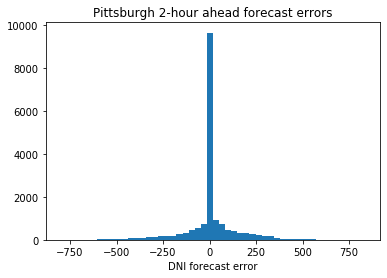

In [31]:
PITerr = np.subtract(PIT_y_test_pred_np, PIT_y_test)
plt.hist(PITerr, bins = 50)
plt.title('Pittsburgh 2-hour ahead forecast errors')
plt.xlabel('DNI forecast error')
mean_err = np.mean(PITerr)
abserr = np.abs(PITerr)
mean_abs_err = np.mean(abserr)
std_abs_err = np.std(abserr)
std_err = np.std(PITerr)
min_err = np.min(PITerr)
max_err = np.max(PITerr)
print('Avg error: ' + str(mean_err))
print('Avg absolute error: ' + str(mean_abs_err))
print('Err Std: ' + str(std_err))
print('Abs Err Std: ' + str(std_abs_err))
print('Min Err: ' + str(min_err))
print('Max Err: ' + str(max_err))

Avg error: 7.768103335232899
Avg absolute error: 70.74858152917756
Err Std: 134.69378016214745
Abs Err Std: 114.87992015755007
Min Err: -774.8093109130859
Max Err: 782.7192993164062


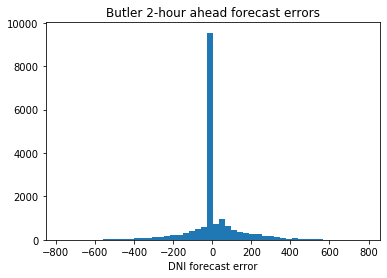

In [32]:
BUTerr = np.subtract(BUT_y_test_pred_np, BUT_y_test)
plt.hist(BUTerr, bins = 50)
plt.title('Butler 2-hour ahead forecast errors')
plt.xlabel('DNI forecast error')
mean_err = np.mean(BUTerr)
abserr = np.abs(BUTerr)
mean_abs_err = np.mean(abserr)
std_abs_err = np.std(abserr)
std_err = np.std(BUTerr)
min_err = np.min(BUTerr)
max_err = np.max(BUTerr)
print('Avg error: ' + str(mean_err))
print('Avg absolute error: ' + str(mean_abs_err))
print('Err Std: ' + str(std_err))
print('Abs Err Std: ' + str(std_abs_err))
print('Min Err: ' + str(min_err))
print('Max Err: ' + str(max_err))

Avg error: 9.976641548637632
Avg absolute error: 69.96162043698972
Err Std: 133.4113096748216
Abs Err Std: 114.03281366155856
Min Err: -693.9105796813965
Max Err: 818.2396240234375


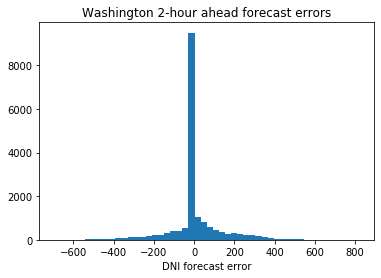

In [33]:
WASerr = np.subtract(WAS_y_test_pred_np, WAS_y_test)
plt.hist(WASerr, bins = 50)
plt.title('Washington 2-hour ahead forecast errors')
plt.xlabel('DNI forecast error')
mean_err = np.mean(WASerr)
abserr = np.abs(WASerr)
mean_abs_err = np.mean(abserr)
std_abs_err = np.std(abserr)
std_err = np.std(WASerr)
min_err = np.min(WASerr)
max_err = np.max(WASerr)
print('Avg error: ' + str(mean_err))
print('Avg absolute error: ' + str(mean_abs_err))
print('Err Std: ' + str(std_err))
print('Abs Err Std: ' + str(std_abs_err))
print('Min Err: ' + str(min_err))
print('Max Err: ' + str(max_err))

Avg error: 8.865161135814004
Avg absolute error: 71.96825694855247
Err Std: 136.92423895012456
Abs Err Std: 116.82212241618403
Min Err: -790.6368103027344
Max Err: 852.8284301757812


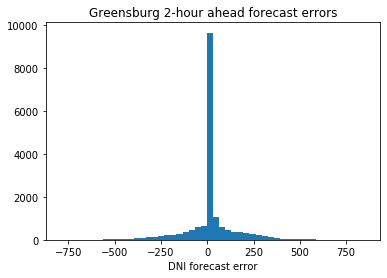

In [34]:
GREerr = np.subtract(GRE_y_test_pred_np, GRE_y_test)
plt.hist(GREerr, bins = 50)
plt.title('Greensburg 2-hour ahead forecast errors')
plt.xlabel('DNI forecast error')
mean_err = np.mean(GREerr)
abserr = np.abs(GREerr)
mean_abs_err = np.mean(abserr)
std_abs_err = np.std(abserr)
std_err = np.std(GREerr)
min_err = np.min(GREerr)
max_err = np.max(GREerr)
print('Avg error: ' + str(mean_err))
print('Avg absolute error: ' + str(mean_abs_err))
print('Err Std: ' + str(std_err))
print('Abs Err Std: ' + str(std_abs_err))
print('Min Err: ' + str(min_err))
print('Max Err: ' + str(max_err))

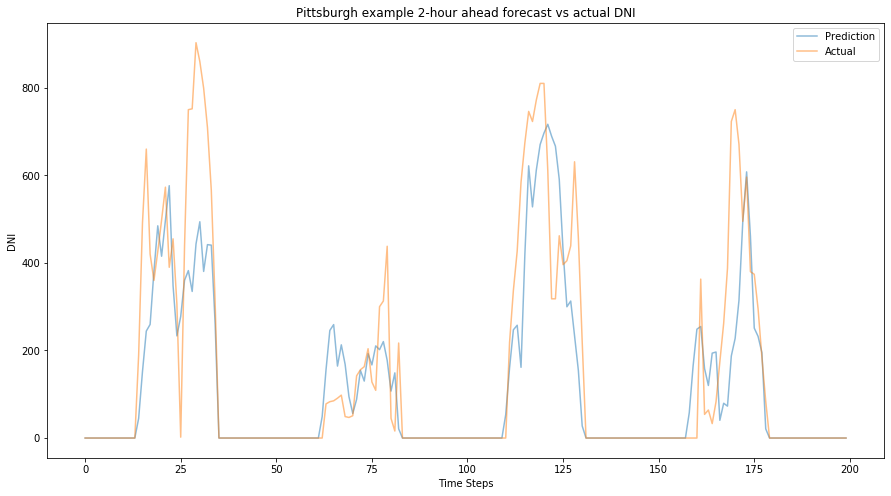

In [35]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
start = 2010
window = 200
plt.plot(PIT_y_test_pred_np[start:(start+window)],alpha = 0.5)
plt.plot(PIT_y_test[start:(start+window)], alpha = 0.5)
plt.legend(['Prediction', 'Actual'])
plt.title('Pittsburgh example 2-hour ahead forecast vs actual DNI')
plt.xlabel('Time Steps')
plt.ylabel('DNI')
plt.show()

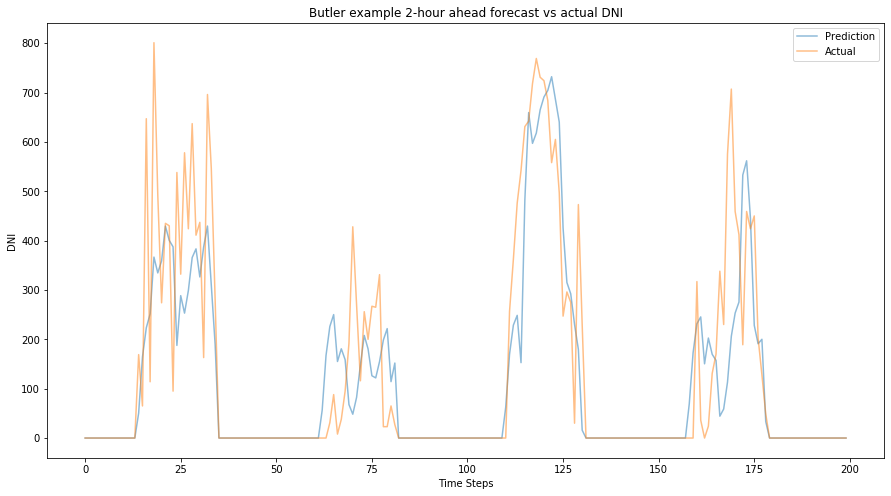

In [36]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
start = 2010
window = 200
plt.plot(BUT_y_test_pred_np[start:(start+window)],alpha = 0.5)
plt.plot(BUT_y_test[start:(start+window)], alpha = 0.5)
plt.legend(['Prediction', 'Actual'])
plt.title('Butler example 2-hour ahead forecast vs actual DNI')
plt.xlabel('Time Steps')
plt.ylabel('DNI')
plt.show()

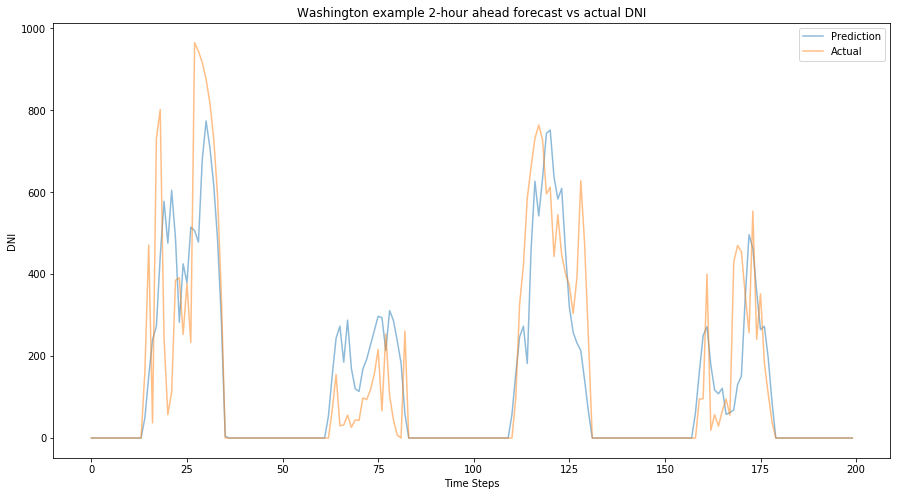

In [37]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
start = 2010
window = 200
plt.plot(WAS_y_test_pred_np[start:(start+window)],alpha = 0.5)
plt.plot(WAS_y_test[start:(start+window)], alpha = 0.5)
plt.legend(['Prediction', 'Actual'])
plt.title('Washington example 2-hour ahead forecast vs actual DNI')
plt.xlabel('Time Steps')
plt.ylabel('DNI')
plt.show()

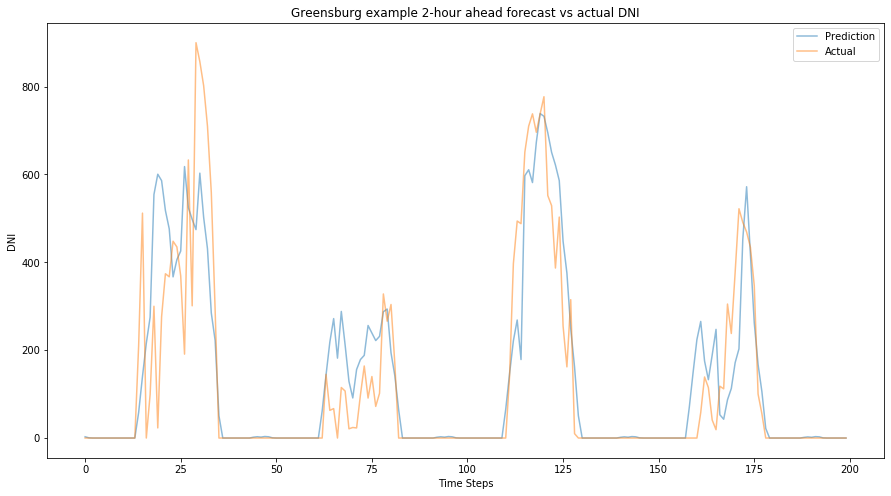

In [38]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
start = 2010
window = 200
plt.plot(GRE_y_test_pred_np[start:(start+window)],alpha = 0.5)
plt.plot(GRE_y_test[start:(start+window)], alpha = 0.5)
plt.legend(['Prediction', 'Actual'])
plt.title('Greensburg example 2-hour ahead forecast vs actual DNI')
plt.xlabel('Time Steps')
plt.ylabel('DNI')
plt.show()

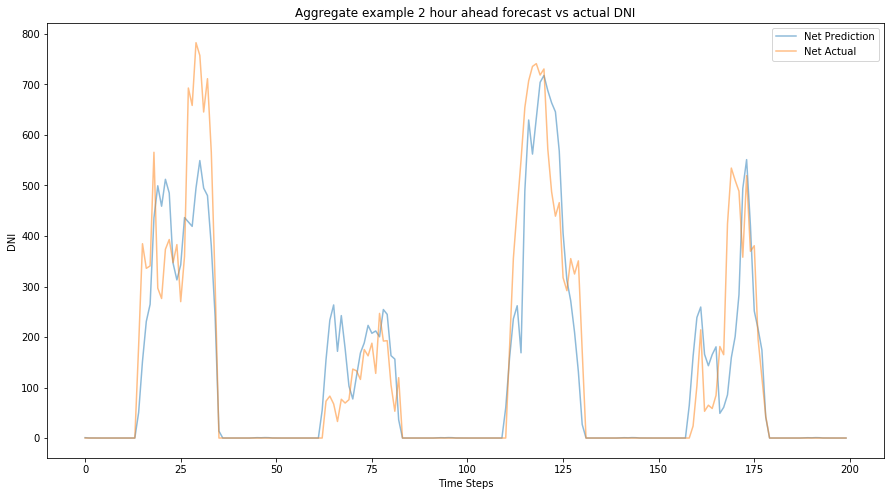

In [41]:
net_prediction = (0.25 * PIT_y_test_pred_np) + (0.25 * BUT_y_test_pred_np) + (0.25 * WAS_y_test_pred_np) + (0.25 * GRE_y_test_pred_np)
net_actual = (0.25 * PIT_y_test) + (0.25 * BUT_y_test) + (0.25 * WAS_y_test) + (0.25 * GRE_y_test)
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
start = 2010
window = 200
plt.plot(net_prediction[start:(start+window)],alpha = 0.5)
plt.plot(net_actual[start:(start+window)], alpha = 0.5)
plt.legend(['Net Prediction', 'Net Actual'])
plt.title('Aggregate example 2 hour ahead forecast vs actual DNI')
plt.xlabel('Time Steps')
plt.ylabel('DNI')
plt.show()


NET Avg error: 7.989763432557974
NET Avg absolute error: 53.92709678057482
NET Err Std: 102.55417640803577
NET Abs Err Std: 87.59602531654777
NET min err: -639.064208984375
NET max err: 670.8330078125


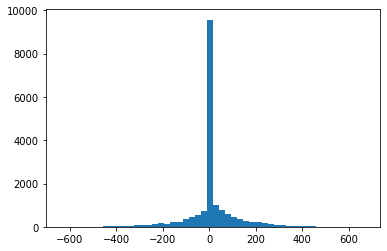

In [39]:
net_err = np.subtract(net_prediction, net_actual)
plt.hist(net_err, bins = 50)
mean_err = np.mean(net_err)
abserr = np.abs(net_err)
mean_abs_err = np.mean(abserr)
std_abs_err = np.std(abserr)
std_err = np.std(net_err)
min_err = np.min(net_err)
max_err = np.max(net_err)
print('NET Avg error: ' + str(mean_err))
print('NET Avg absolute error: ' + str(mean_abs_err))
print('NET Err Std: ' + str(std_err))
print('NET Abs Err Std: ' + str(std_abs_err))
print('NET min err: ' + str(min_err))
print('NET max err: ' + str(max_err))

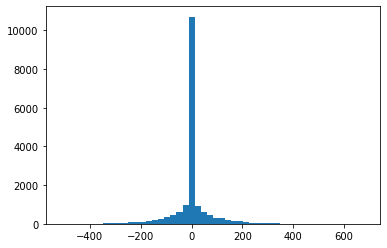

Avg half_hour_ROC: 0.0
Avg absolute half_hour_ROC: 35.97747259022385
Half_hour_ROC Std: 74.28808508194041
Abs half_hour_ROC Std: 64.99493096512458


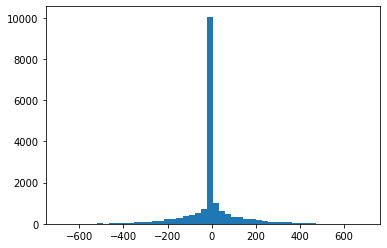

Avg hour_ROC: 0.0
Avg absolute hour_ROC: 55.81126149277597
Hour_ROC Std: 111.45430884638276
Abs Hour_ROC Std: 96.47365469914499


In [30]:
half_hour_ROC = net_actual[1:] - net_actual[:-1]
hour_ROC = net_actual[2:] - net_actual[:-2]
plt.hist(half_hour_ROC, bins = 50)
plt.show()
mean_half_hour_ROC = np.mean(half_hour_ROC)
abs_half_hour_ROC = np.abs(half_hour_ROC)
mean_abs_half_hour_ROC = np.mean(abs_half_hour_ROC)
std_abs_half_hour_ROC = np.std(abs_half_hour_ROC)
std_half_hour_ROC = np.std(half_hour_ROC)
print('Avg half_hour_ROC: ' + str(mean_half_hour_ROC))
print('Avg absolute half_hour_ROC: ' + str(mean_abs_half_hour_ROC))
print('Half_hour_ROC Std: ' + str(std_half_hour_ROC))
print('Abs half_hour_ROC Std: ' + str(std_abs_half_hour_ROC))

plt.hist(hour_ROC, bins = 50)
plt.show()
mean_hour_ROC = np.mean(hour_ROC)
abs_hour_ROC = np.abs(hour_ROC)
mean_abs_hour_ROC = np.mean(abs_hour_ROC)
std_abs_hour_ROC = np.std(abs_hour_ROC)
std_hour_ROC = np.std(hour_ROC)
print('Avg hour_ROC: ' + str(mean_hour_ROC))
print('Avg absolute hour_ROC: ' + str(mean_abs_hour_ROC))
print('Hour_ROC Std: ' + str(std_hour_ROC))
print('Abs Hour_ROC Std: ' + str(std_abs_hour_ROC))